In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [0]:
# Load the dataset into a pandas dataframe 
ledger = spark.read.format('csv') \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("/FileStore/tables/ledger_fy22_qtr1-1.csv")

ledger = ledger.toPandas()

In [0]:
# Columns with some missing values: PROJECT_ID, CHARTFIELD2, CHARTFIELD1, PRODUCT, OPERATING_UNIT
# Columns with no values whatsoever: OPERUNITDESCR, PRODUCTDESCR, PGMDESCR, CF1DESCR, CF2DESCR, PROJDESCR, ACTIVITY, ACTVDESCR, RESTYPE, RESDESCR, RCAT, RCATDESCR, RSUBCAT, RSUBCATDESCR


# Dropping all the columns that have no values 
filter_ledger = ledger.drop(columns=['OPERUNITDESCR', 'PRODUCTDESCR', 'PGMDESCR', 'CF1DESCR', 'CF2DESCR', 'PROJDESCR', 'ACTIVITY', 'ACTVDESCR', 'RESTYPE', 'RESDESCR', 'RCAT', 'RCATDESCR', 'RSUBCAT', 'RSUBCATDESCR'])

In [0]:
# Columns in filter_ledger that have some empty values: OPERATINGUNIT, PRODUCT, BUDGET_RED, CHARTFIELD01, CHARTFIELD02, PROJECT_ID 
filter_ledger[0:5] 

,AGENCYNBR,AGENCYNAME,LEDGER,FISCAL_YEAR,ACCOUNTING_PERIOD,FUND_CODE,FUNDDESCR,CLASS_FLD,CLASSDESCR,DEPTID,DEPTDESCR,ACCOUNT,ACCTDESCR,OPERATING_UNIT,PRODUCT,PROGRAM_CODE,BUDGET_REF,CHARTFIELD1,CHARTFIELD2,PROJECT_ID,POSTED_TOTAL_AMT,ROWID
0,0,STATE OF OKLAHOMA,ACTUALS,2022.0,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,412175,Business Activity Tax,,,NP000,,,,,-256.12,AAJsAKAIoAABFPGAAH
1,0,STATE OF OKLAHOMA,ACTUALS,2022.0,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,415181,Vehicle Revenue Tax Stamps,,,NP000,,,,,-4917.17,AAJsAKAIoAABFPGAAM
2,0,STATE OF OKLAHOMA,ACTUALS,2022.0,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,417121,Documentary Stamp Tax,,,NP000,,,,,-1625395.47,AAJsAKAIoAABFPGAAS
3,0,STATE OF OKLAHOMA,ACTUALS,2022.0,1.0,1000,General Fund - No Divisions,16100,Alcoholic Beverage Control Fd,7999999,Clearing and ASA Department,420121,Alcoholic Beverage License,,,B0100,21,,,,-965194.00,AAJsAKAIoAABFcxAAa
4,0,STATE OF OKLAHOMA,ACTUALS,2022.0,1.0,1000,General Fund - No Divisions,19200,General Revenue Fund,7999999,Clearing and ASA Department,421381,Securities Agents Fees,,,B0100,22,,,,-60750.00,AAJsAKAHlAAMHLRAAt


In [0]:
# All the unique AGENCIES in the transactions 
filter_ledger['AGENCYNAME'].unique()

array(['STATE OF OKLAHOMA', 'OKLAHOMA STATE UNIVERSITY',
       'OSU-EXPERIMENT STATION', 'OSU-EXTENSION DIVISION',
       'OSU-TECHNICAL BRANCH, OKMULGEE',
       'OSU COLLEGE OF VETERINARY MEDICINE', 'OSU-OKLAHOMA CITY',
       'OSU-TULSA', 'OKLAHOMA ACCOUNTANCY BOARD',
       'OKLAHOMA ABSTRACTORS BOARD', 'OKLAHOMA MILITARY DEPARTMENT',
       'ALCOHOLIC BEV. LAWS ENFORCE.', 'BOLL WEEVIL ERADICATION ORG.',
       'DEPT OF AGRICULTURE FOOD & FORESTRY',
       'WESTERN OKLA. STATE COLLEGE', 'OKLA. BD. OF ARCHITECTS',
       'INDIGENT DEFENSE SYSTEM', 'ATTORNEY GENERAL',
       'STATE ARTS COUNCIL', 'OKLAHOMA AERONAUTICS COMMISSION',
       'STATE BANKING DEPARTMENT',
       'OFFICE OF MANAGEMENT AND ENTERPRISE SERV',
       'TOBACCO SETTLEMENT ENDMT TRUST', 'CAMERON UNIVERSITY',
       'CAPITOL IMPROVEMENT AUTHORITY', 'CARL ALBERT STATE COLLEGE',
       'UNIV. OF CENTRAL OKLA.', 'DEPARTMENT OF MINES',
       'COMMISSION ON CHILDREN AND YOUTH', 'DEPARTMENT OF CORRECTIONS',
       'ST. 

In [0]:
# We know that it's an actuals ledger that was produced in 2022 fiscal year, so don't need that information
filter_ledger = filter_ledger.drop(["LEDGER", "FISCAL_YEAR"], axis=1)

In [0]:
filter_ledger.head(5)

,AGENCYNBR,AGENCYNAME,ACCOUNTING_PERIOD,FUND_CODE,FUNDDESCR,CLASS_FLD,CLASSDESCR,DEPTID,DEPTDESCR,ACCOUNT,ACCTDESCR,OPERATING_UNIT,PRODUCT,PROGRAM_CODE,BUDGET_REF,CHARTFIELD1,CHARTFIELD2,PROJECT_ID,POSTED_TOTAL_AMT,ROWID
0,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,412175,Business Activity Tax,,,NP000,,,,,-256.12,AAJsAKAIoAABFPGAAH
1,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,415181,Vehicle Revenue Tax Stamps,,,NP000,,,,,-4917.17,AAJsAKAIoAABFPGAAM
2,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,417121,Documentary Stamp Tax,,,NP000,,,,,-1625395.47,AAJsAKAIoAABFPGAAS
3,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,16100,Alcoholic Beverage Control Fd,7999999,Clearing and ASA Department,420121,Alcoholic Beverage License,,,B0100,21,,,,-965194.00,AAJsAKAIoAABFcxAAa
4,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19200,General Revenue Fund,7999999,Clearing and ASA Department,421381,Securities Agents Fees,,,B0100,22,,,,-60750.00,AAJsAKAHlAAMHLRAAt


In [0]:
# Filling all the ' ' values by 'UNKNOWN'
filter_ledger = filter_ledger.replace({' ': 'UNKNOWN'})

In [0]:
filter_ledger.head()

,AGENCYNBR,AGENCYNAME,ACCOUNTING_PERIOD,FUND_CODE,FUNDDESCR,CLASS_FLD,CLASSDESCR,DEPTID,DEPTDESCR,ACCOUNT,ACCTDESCR,OPERATING_UNIT,PRODUCT,PROGRAM_CODE,BUDGET_REF,CHARTFIELD1,CHARTFIELD2,PROJECT_ID,POSTED_TOTAL_AMT,ROWID
0,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,412175,Business Activity Tax,UNKNOWN,UNKNOWN,NP000,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,-256.12,AAJsAKAIoAABFPGAAH
1,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,415181,Vehicle Revenue Tax Stamps,UNKNOWN,UNKNOWN,NP000,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,-4917.17,AAJsAKAIoAABFPGAAM
2,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19100,General Revenue Fund,7999999,Clearing and ASA Department,417121,Documentary Stamp Tax,UNKNOWN,UNKNOWN,NP000,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,-1625395.47,AAJsAKAIoAABFPGAAS
3,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,16100,Alcoholic Beverage Control Fd,7999999,Clearing and ASA Department,420121,Alcoholic Beverage License,UNKNOWN,UNKNOWN,B0100,21,UNKNOWN,UNKNOWN,UNKNOWN,-965194.00,AAJsAKAIoAABFcxAAa
4,0,STATE OF OKLAHOMA,1.0,1000,General Fund - No Divisions,19200,General Revenue Fund,7999999,Clearing and ASA Department,421381,Securities Agents Fees,UNKNOWN,UNKNOWN,B0100,22,UNKNOWN,UNKNOWN,UNKNOWN,-60750.00,AAJsAKAHlAAMHLRAAt


In [0]:
# All the unique AGENCIES in the transactions 
filter_ledger['AGENCYNAME'].unique()

array(['STATE OF OKLAHOMA', 'OKLAHOMA STATE UNIVERSITY',
       'OSU-EXPERIMENT STATION', 'OSU-EXTENSION DIVISION',
       'OSU-TECHNICAL BRANCH, OKMULGEE',
       'OSU COLLEGE OF VETERINARY MEDICINE', 'OSU-OKLAHOMA CITY',
       'OSU-TULSA', 'OKLAHOMA ACCOUNTANCY BOARD',
       'OKLAHOMA ABSTRACTORS BOARD', 'OKLAHOMA MILITARY DEPARTMENT',
       'ALCOHOLIC BEV. LAWS ENFORCE.', 'BOLL WEEVIL ERADICATION ORG.',
       'DEPT OF AGRICULTURE FOOD & FORESTRY',
       'WESTERN OKLA. STATE COLLEGE', 'OKLA. BD. OF ARCHITECTS',
       'INDIGENT DEFENSE SYSTEM', 'ATTORNEY GENERAL',
       'STATE ARTS COUNCIL', 'OKLAHOMA AERONAUTICS COMMISSION',
       'STATE BANKING DEPARTMENT',
       'OFFICE OF MANAGEMENT AND ENTERPRISE SERV',
       'TOBACCO SETTLEMENT ENDMT TRUST', 'CAMERON UNIVERSITY',
       'CAPITOL IMPROVEMENT AUTHORITY', 'CARL ALBERT STATE COLLEGE',
       'UNIV. OF CENTRAL OKLA.', 'DEPARTMENT OF MINES',
       'COMMISSION ON CHILDREN AND YOUTH', 'DEPARTMENT OF CORRECTIONS',
       'ST. 

In [0]:
# Each unique agencies and the number of ledgers they have in the given dataset
filter_ledger.AGENCYNAME.value_counts()

EMPLOYMENT SECURITY COMMISSION              41502
OKLAHOMA STATE DEPARTMENT OF HEALTH         30577
MENTAL HEALTH AND SUBSTANCE ABUSE SERV.     22875
OFFICE OF MANAGEMENT AND ENTERPRISE SERV    18188
DEPT. OF ENVIRONMENTAL QUALITY              13364
                                            ...  
ST. BD. OF PODIATRIC MED. EXAM.                35
OUHSC PROF. PRAC. PLAN.                        32
ST. BD. OF EXAMINERS OF PERFUSIONISTS          30
OU TULSA                                        7
BUILDING BONDS COMMISSION                       3
Name: AGENCYNAME, Length: 170, dtype: int64

In [0]:
ledger_positive_amts = filter_ledger[filter_ledger["POSTED_TOTAL_AMT"] > 0]
ledger_positive_amts

,AGENCYNBR,AGENCYNAME,ACCOUNTING_PERIOD,FUND_CODE,FUNDDESCR,CLASS_FLD,CLASSDESCR,DEPTID,DEPTDESCR,ACCOUNT,ACCTDESCR,OPERATING_UNIT,PRODUCT,PROGRAM_CODE,BUDGET_REF,CHARTFIELD1,CHARTFIELD2,PROJECT_ID,POSTED_TOTAL_AMT,ROWID
67,1000,OKLAHOMA STATE UNIVERSITY,1.0,9000,Higher Educ Component Unit,43000,Agency Relationship Fund,2100001,Sponsored Programs,511150,Sals-H.Ed Prof.(Non-Teach) Pay,UNKNOWN,UNKNOWN,C0103,21,UNKNOWN,UNKNOWN,UNKNOWN,1.553239e+05,AAJsAKAIoAABFGoAAN
68,1000,OKLAHOMA STATE UNIVERSITY,1.0,9000,Higher Educ Component Unit,70100,OSU 700 Fund,1000001,700 Funds,511170,Sals-H.Ed Other Teach Pay,UNKNOWN,UNKNOWN,C0103,22,UNKNOWN,UNKNOWN,UNKNOWN,1.432811e+04,AAJsAKAHkAALYxwAAl
69,1000,OKLAHOMA STATE UNIVERSITY,1.0,9000,Higher Educ Component Unit,70100,OSU 700 Fund,1000001,700 Funds,512120,Insur.Prem-Hlth-Life-Other,UNKNOWN,UNKNOWN,C0103,22,UNKNOWN,UNKNOWN,UNKNOWN,5.546533e+04,AAJsAKAHkAALY0fAAY
70,1000,OKLAHOMA STATE UNIVERSITY,1.0,9000,Higher Educ Component Unit,43000,Agency Relationship Fund,2100001,Sponsored Programs,513110,Employer Share-FICA,UNKNOWN,UNKNOWN,C0103,22,UNKNOWN,UNKNOWN,UNKNOWN,1.305639e+05,AAJsAKAHlAAMJryAAS
71,1000,OKLAHOMA STATE UNIVERSITY,1.0,9000,Higher Educ Component Unit,70100,OSU 700 Fund,1000001,700 Funds,513240,Employer Share-OtherAuthRetSys,UNKNOWN,UNKNOWN,C0103,22,UNKNOWN,UNKNOWN,UNKNOWN,1.149107e+06,AAJsAKAHlAAMJryAAW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310283,77500,OSU MEDICAL AUTHORITY,2.0,9000,Higher Educ Component Unit,48900,CARES Economic Development Pro,UNKNOWN,None,101000,Cash - Combining Trial Balance,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,3.000000e+06,AAJsAKAHlAAMJrSAAK
310288,80000,OKLA. CAREER AND TECHNOLOGY EDUCATION,3.0,1000,General Fund - No Divisions,38012,Lottery FY2022,UNKNOWN,None,101000,Cash - Combining Trial Balance,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1.010488e+05,AAJsAKAHkAALaJ8AAA
310291,80700,HEALTH CARE AUTHORITY,1.0,1000,General Fund - No Divisions,19102,Duties,UNKNOWN,None,101000,Cash - Combining Trial Balance,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1.200000e+08,AAJsAKAIoAABFBYAAu
310295,27500,OFFICE OF EDUC. QUALITY & ACCOUNTABILITY,1.0,1000,General Fund - No Divisions,57605,Duties,UNKNOWN,None,101000,Cash - Combining Trial Balance,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,5.000000e+05,AAJsAKAIoAABE5pAAU


In [0]:
incoming_amount = ledger_positive_amts[["AGENCYNAME", "POSTED_TOTAL_AMT"]].groupby(by=["AGENCYNAME"]).agg('sum')
incoming_amount = incoming_amount.rename({"POSTED_TOTAL_AMT": "Funds Per Agency"}, axis=1)
incoming_amount.head(10)

,Funds Per Agency
AGENCYNAME,
ALCOHOLIC BEV. LAWS ENFORCE.,1.435726e+08
ATTORNEY GENERAL,9.244857e+08
BD OF LIC ALCOHOL & DRUG COUNS,5.041441e+06
BD. OF CHEM. TEST ALCOHOL/DRUG,2.167900e+07
BD. OF EXAM. FOR LT CARE ADMIN.,1.178174e+07
BD. OF MED. LICENSURE & SUPV.,1.066612e+08
BD. OF PRIV. VOCATIONAL SCHOOLS,6.393189e+06
BD. OF PSYCHOLOGISTS EXAMINERS,7.245921e+06
BD. OF VETERINARY MED. EXAM.,1.402133e+07


In [0]:
ledger_expenditures = filter_ledger[filter_ledger["POSTED_TOTAL_AMT"] < 0]
outgoing_amount = ledger_expenditures[["AGENCYNAME", "POSTED_TOTAL_AMT"]].groupby(by=["AGENCYNAME"]).agg('sum')
outgoing_amount = outgoing_amount.rename({"POSTED_TOTAL_AMT": "Expenses Per Agency"}, axis=1)
outgoing_amount.head(10)

,Expenses Per Agency
AGENCYNAME,
ALCOHOLIC BEV. LAWS ENFORCE.,-1.391984e+08
ATTORNEY GENERAL,-8.586783e+08
BD OF LIC ALCOHOL & DRUG COUNS,-4.835598e+06
BD. OF CHEM. TEST ALCOHOL/DRUG,-2.102610e+07
BD. OF EXAM. FOR LT CARE ADMIN.,-1.132737e+07
BD. OF MED. LICENSURE & SUPV.,-9.945522e+07
BD. OF PRIV. VOCATIONAL SCHOOLS,-6.292143e+06
BD. OF PSYCHOLOGISTS EXAMINERS,-6.861878e+06
BD. OF VETERINARY MED. EXAM.,-1.315918e+07


In [0]:
# A function to filter to only show one certain agency of interest and its transaction details. 
def filterColTrans(dataframe, filterbyVal):
    newDF = dataframe[dataframe['AGENCYNAME'] == filterbyVal] 
    newDF = newDF[['AGENCYNAME', 'FUNDDESCR', 'CLASSDESCR', 'DEPTDESCR', 'POSTED_TOTAL_AMT']]
    return newDF 

In [0]:
# Example using filterColTrans
oklahomaAlc = filterColTrans(filter_ledger, 'BD OF LIC ALCOHOL & DRUG COUNS')

In [0]:
oklahomaAlc.head()

,AGENCYNAME,FUNDDESCR,CLASSDESCR,DEPTDESCR,POSTED_TOTAL_AMT
21013,BD OF LIC ALCOHOL & DRUG COUNS,General Fund - No Divisions,Revolving Fund,General Operations,4746.00
21014,BD OF LIC ALCOHOL & DRUG COUNS,General Fund - No Divisions,Revolving Fund,General Operations,26.73
21015,BD OF LIC ALCOHOL & DRUG COUNS,General Fund - No Divisions,Revolving Fund,General Operations,5123.50
21016,BD OF LIC ALCOHOL & DRUG COUNS,General Fund - No Divisions,Revolving Fund,General Operations,28.60
35221,BD OF LIC ALCOHOL & DRUG COUNS,General Fund - No Divisions,Employer Benefits Taxes,None,-3091.85


In [0]:
joined_df = incoming_amount.join(outgoing_amount)

joined_df["Total Left Over"] = joined_df["Funds Per Agency"] + joined_df["Expenses Per Agency"]
joined_df["Percentage of Funds Spent"] = (1 - (joined_df["Total Left Over"] / joined_df["Funds Per Agency"])) * 100

joined_df = joined_df.reset_index()


joined_df.head(4)

,AGENCYNAME,Funds Per Agency,Expenses Per Agency,Total Left Over,Percentage of Funds Spent
0,ALCOHOLIC BEV. LAWS ENFORCE.,1.435726e+08,-1.391984e+08,4374216.34,96.953308
1,ATTORNEY GENERAL,9.244857e+08,-8.586783e+08,65807460.34,92.881723
2,BD OF LIC ALCOHOL & DRUG COUNS,5.041441e+06,-4.835598e+06,205842.65,95.916987
3,BD. OF CHEM. TEST ALCOHOL/DRUG,2.167900e+07,-2.102610e+07,652903.66,96.988313


<AxesSubplot:xlabel='AGENCYNAME', ylabel='Percentage of Funds Spent'>

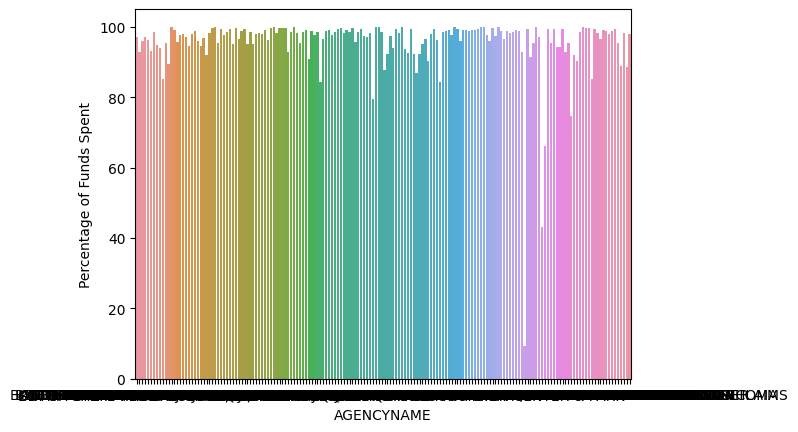

In [0]:
sns.barplot(data=joined_df, x="AGENCYNAME", y="Percentage of Funds Spent")

/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funds Per Agency'>

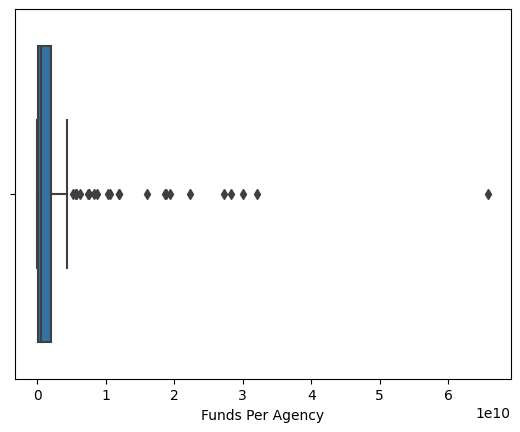

In [0]:
sns.boxplot(joined_df['Funds Per Agency'])

/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Expenses Per Agency'>

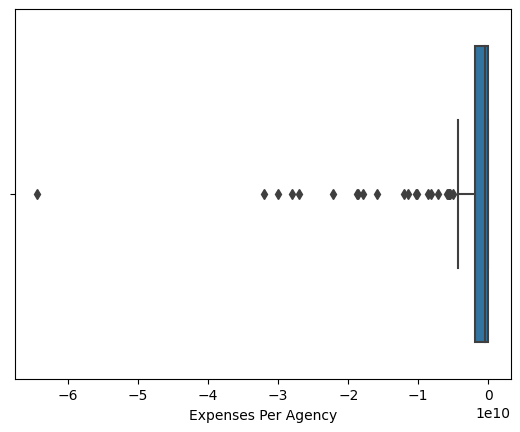

In [0]:
sns.boxplot(joined_df['Expenses Per Agency'])

/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Percentage of Funds Spent'>

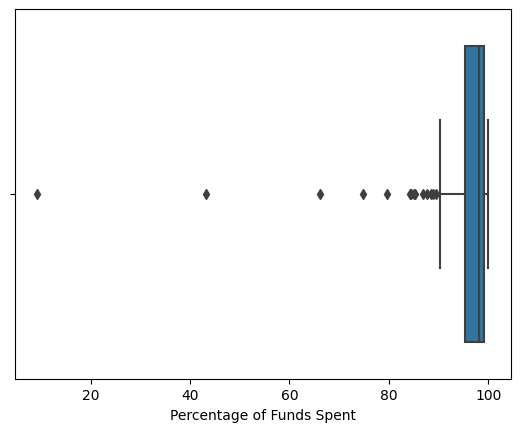

In [0]:
sns.boxplot(joined_df['Percentage of Funds Spent'])

In [0]:
upper_array=joined_df[joined_df['Funds Per Agency']>=1.957016e+09]['Funds Per Agency']
upper_array

14     7.577908e+09
17     2.190180e+09
23     4.331248e+09
28     1.974999e+09
29     1.603792e+10
30     1.037091e+10
32     2.728659e+10
36     5.614239e+09
37     2.838189e+09
39     2.115139e+09
40     1.873204e+10
41     4.189841e+09
44     2.016018e+09
46     3.245023e+09
47     2.148236e+09
50     5.696740e+09
51     1.868363e+10
54     5.704645e+09
56     1.195699e+10
65     8.742231e+09
71     3.084070e+09
76     2.844352e+09
78     1.066445e+10
83     1.197939e+10
89     2.683673e+09
90     2.499468e+09
101    2.176517e+09
105    8.257214e+09
107    2.826655e+10
108    6.587160e+10
119    4.353903e+09
122    2.850629e+09
126    6.159927e+09
131    2.391991e+09
137    2.998424e+10
149    7.352632e+09
151    2.799781e+09
153    3.212502e+10
155    3.964182e+09
157    2.189277e+09
158    5.135335e+09
159    1.938354e+10
164    2.230881e+10
Name: Funds Per Agency, dtype: float64

In [0]:
no_outliers_funds = joined_df[joined_df['Funds Per Agency']<1.957016e+09]
no_outliers_funds = no_outliers_funds[no_outliers_funds['Funds Per Agency']>5.441266e+07]

In [0]:
no_outliers_funds

,AGENCYNAME,Funds Per Agency,Expenses Per Agency,Total Left Over,Percentage of Funds Spent
0,ALCOHOLIC BEV. LAWS ENFORCE.,1.435726e+08,-1.391984e+08,4.374216e+06,96.953308
1,ATTORNEY GENERAL,9.244857e+08,-8.586783e+08,6.580746e+07,92.881723
5,BD. OF MED. LICENSURE & SUPV.,1.066612e+08,-9.945522e+07,7.205993e+06,93.244036
13,CAMERON UNIVERSITY,1.568522e+09,-1.551953e+09,1.656871e+07,98.943674
15,CARL ALBERT STATE COLLEGE,6.434918e+08,-6.283655e+08,1.512634e+07,97.649334
...,...,...,...,...,...
163,UNIVERSITY CENTER OF SOUTHERN OKLAHOMA,5.840630e+07,-5.777586e+07,6.304350e+05,98.920604
166,WATER RESOURCES BOARD,1.903070e+09,-1.689826e+09,2.132438e+08,88.794745
167,WESTERN OKLA. STATE COLLEGE,4.012821e+08,-3.946267e+08,6.655424e+06,98.341460
168,WORKER'S COMP. COMMISSION,8.822954e+07,-7.808345e+07,1.014608e+07,88.500355


Text(0.5, 1.0, 'Distribution of Funds Per Agency')

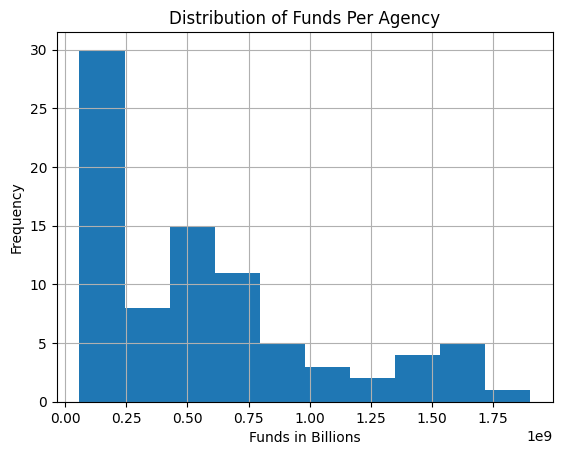

In [0]:
ax = no_outliers_funds['Funds Per Agency'].hist()
ax.set(xlabel="Funds in Billions", ylabel="Frequency")
ax.set_title("Distribution of Funds Per Agency")

In [0]:
no_outliers_exp = joined_df[joined_df['Expenses Per Agency']>-1.836443e+09]
no_outliers_exp = no_outliers_exp[no_outliers_exp['Expenses Per Agency']<-5.354166e+07]

Text(0.5, 1.0, 'Distribution of Expenses Per Agency')

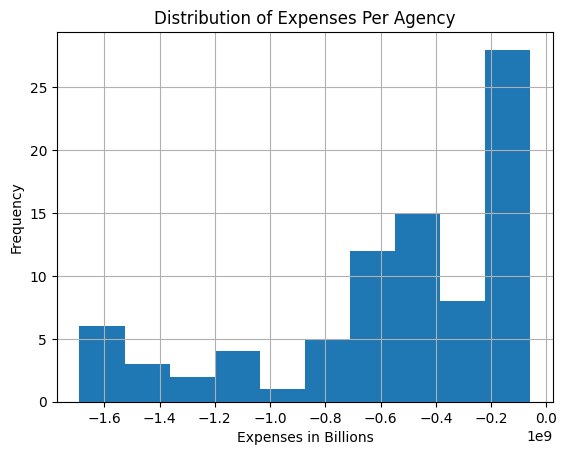

In [0]:
ax2 = no_outliers_exp['Expenses Per Agency'].hist()
ax2.set(xlabel="Expenses in Billions", ylabel="Frequency")
ax2.set_title("Distribution of Expenses Per Agency")

In [0]:
joined_df.describe()[['Funds Per Agency','Expenses Per Agency','Percentage of Funds Spent']]

,Funds Per Agency,Expenses Per Agency,Percentage of Funds Spent
count,1.700000e+02,1.700000e+02,170.000000
mean,2.877214e+09,-2.818233e+09,95.594016
std,7.450562e+09,7.326178e+09,9.068855
min,2.371000e+04,-6.437573e+10,9.287548
25%,5.441266e+07,-1.836443e+09,95.358628
50%,4.749631e+08,-4.691759e+08,98.100533
75%,1.957016e+09,-5.354166e+07,99.136265
max,6.587160e+10,-2.371000e+04,100.000000


In [0]:
no_outliers_per = joined_df[joined_df['Percentage of Funds Spent']<99.136265]
no_outliers_per = joined_df[joined_df['Percentage of Funds Spent']>95.358628]

Text(0.5, 1.0, 'Distribution of Percentage of Funds Spent')

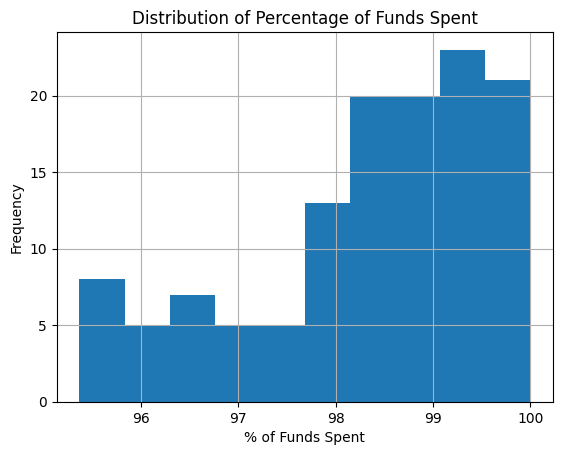

In [0]:
ax3 = no_outliers_per['Percentage of Funds Spent'].hist()
ax3.set(xlabel="% of Funds Spent", ylabel="Frequency")
ax3.set_title("Distribution of Percentage of Funds Spent")

In [0]:
no_outliers = no_outliers_funds[no_outliers_funds['Percentage of Funds Spent']>95.35]

<AxesSubplot:xlabel='Funds Per Agency', ylabel='Percentage of Funds Spent'>

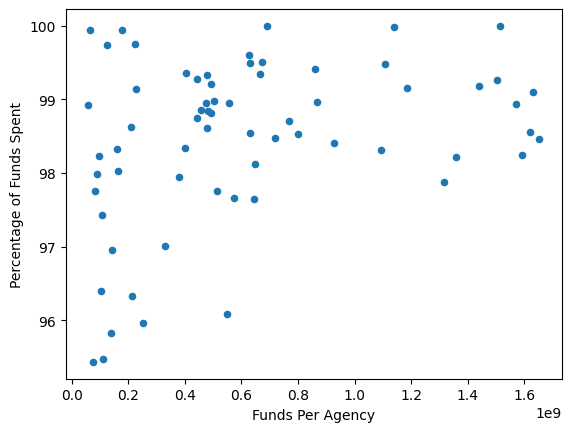

In [0]:
no_outliers.plot.scatter(x='Funds Per Agency', y='Percentage of Funds Spent')

/databricks/python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funds Per Agency', ylabel='Percentage of Funds Spent'>

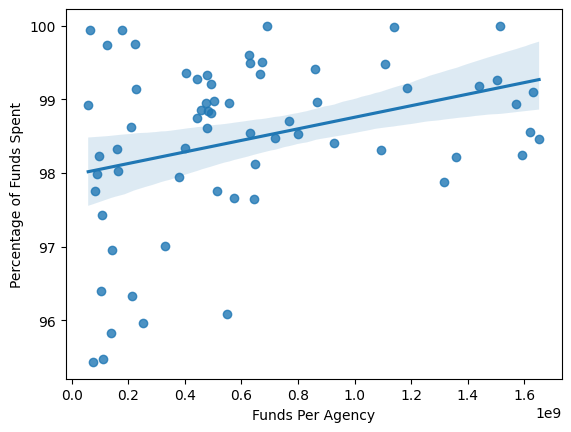

In [0]:
sns.regplot(no_outliers['Funds Per Agency'],no_outliers['Percentage of Funds Spent'])

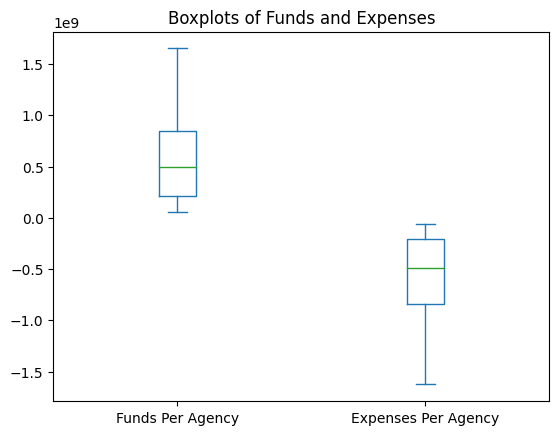

In [0]:
ax = no_outliers[['Funds Per Agency', 'Expenses Per Agency']].plot(kind='box', title='Boxplots of Funds and Expenses')
plt.show()

In [0]:
np.corrcoef(no_outliers['Funds Per Agency'], no_outliers['Percentage of Funds Spent'])

array([[1.        , 0.32982962],
       [0.32982962, 1.        ]])